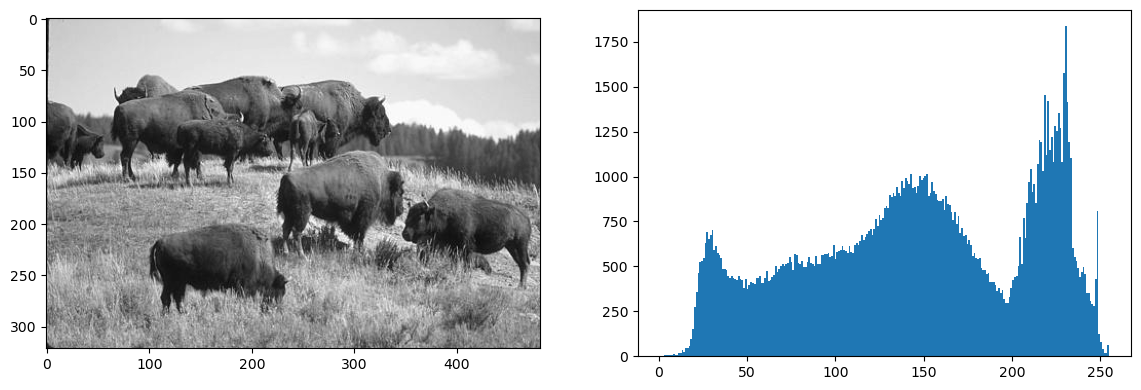

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from PIL import Image

img = plt.imread('gnu.jpg')

plt.figure(figsize=[14, 4.5])
plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')
plt.subplot(1, 2, 2)
_=plt.hist(img.ravel(), 255)

In [2]:
# Create class instance and fit to data
gmm = GaussianMixture(n_components=3, covariance_type='spherical', n_init=1)
gmm.fit(img.reshape(-1, 1))

GaussianMixture(covariance_type='spherical', n_components=3)

In [3]:
# Get information about the adjusted Normal distributions
print(gmm.means_)
print(gmm.covariances_**0.5)
print(gmm.weights_)

[[145.93306208]
 [223.21479812]
 [ 61.1740015 ]]
[28.41108987 12.87740964 27.23789049]
[0.46359653 0.27594748 0.26045599]


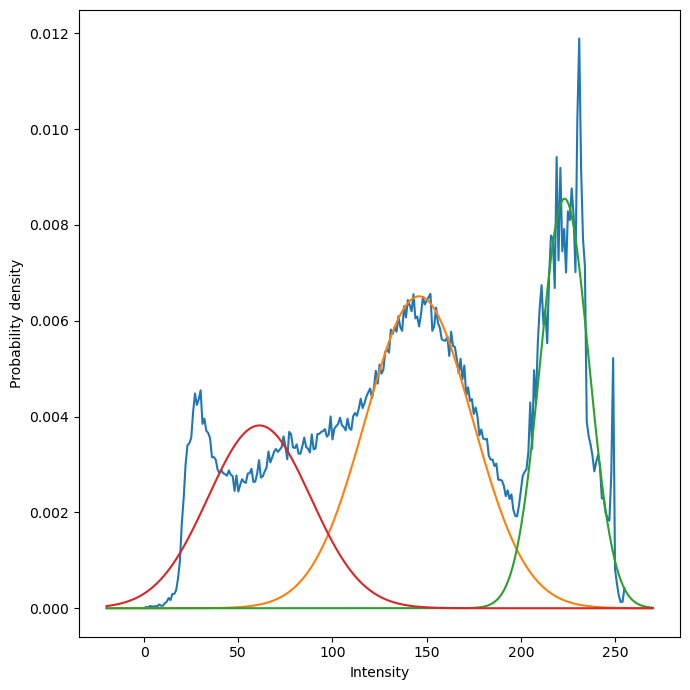

In [4]:
def normal_1d(x, mu, variance):
    '''1D Normal distribution with average 'mu' and variance given by variable 'variance'.
       Variable 'x' can be a numpy array of values, in which case the fucntion returns
       an array.'''
    
    sigma = variance**0.5
    gauss = np.exp(-(x - mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)
    
    return gauss

# Histogram normalized so that the area under the curve is equal to 1
# (a probability density function)
bins = range(257)
hist, _ = np.histogram(img, bins)
prob = (bins[1]-bins[0])*hist/float(sum(hist))

# Get information about the adjusted Normal distributions
averages = gmm.means_
variances = gmm.covariances_
weights = gmm.weights_

# Defining the probability functions
bins_model = np.linspace(-20, 270, 500)
prob_classes = []
for c in range(3):
    prob_c = weights[c]*normal_1d(bins_model, averages[c], variances[c])
    prob_classes.append(prob_c)

plt.figure(figsize=[7,7])
plt.plot(bins[:-1], prob)
plt.plot(bins_model, prob_classes[0])
plt.plot(bins_model, prob_classes[1])
plt.plot(bins_model, prob_classes[2])
plt.xlabel('Intensity')
plt.ylabel('Probability density')
plt.tight_layout()

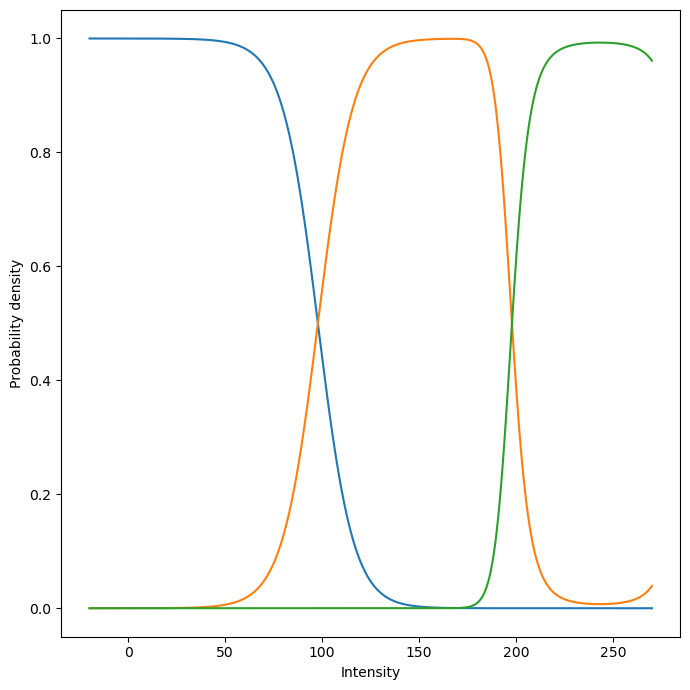

In [5]:
s = prob_classes[0]+prob_classes[1]+prob_classes[2]

plt.figure(figsize=[7,7])
for c in range(3):
    plt.plot(bins_model, prob_classes[c]/s)
plt.xlabel('Intensity')
plt.ylabel('Probability density')
plt.tight_layout()

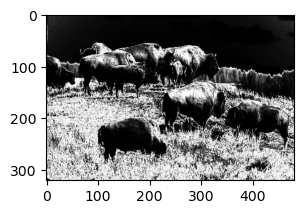

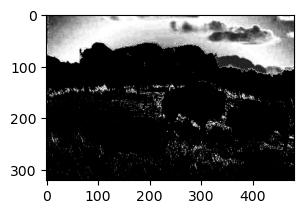

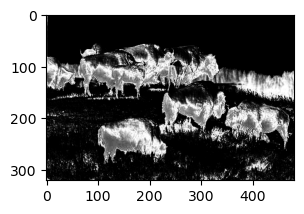

In [5]:
for c in range(3):
    p = prob_classes[c][np.digitize(img.ravel(), bins_model)]
    plt.figure()
    plt.imshow(p.reshape(img.shape), 'gray')